In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Path = "drive/Shared drives/Data_Mining_Final_Project/"

In [ ]:
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

In [ ]:
train_input = Path+"Heart_Attack_dataset/train/"
train_val = Path+"Heart_Attack_dataset/val/"
test = Path+"Heart_Attack_dataset/test/"

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

img_width, img_height = 48, 48
batch_size = 48
n_epochs = 10

train_generator = train_datagen.flow_from_directory(
    train_input,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = test_datagen.flow_from_directory(
    train_val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 22344 images belonging to 2 classes.
Found 4788 images belonging to 2 classes.
Found 3184 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding ="same", input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
sgd = SGD(lr=0.003, decay=1e-4, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=5,#train_generator.samples // batch_size,
    epochs=5, #n_epochs,
    validation_data=val_generator,
    validation_steps=2)#val_generator.samples // batch_size)

model.save('Path/new_models/model3.h5', overwrite=True, include_optimizer=True)

Epoch 1/5
5/5 [==============================] - 322s 68s/step - loss: 0.6931 - accuracy: 0.5083 - val_loss: 0.6933 - val_accuracy: 0.5312
Epoch 2/5
5/5 [==============================] - 313s 68s/step - loss: 0.6966 - accuracy: 0.3875 - val_loss: 0.6927 - val_accuracy: 0.5625
Epoch 3/5
5/5 [==============================] - 302s 66s/step - loss: 0.6941 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5208
Epoch 4/5
5/5 [==============================] - 300s 66s/step - loss: 0.6937 - accuracy: 0.4917 - val_loss: 0.6917 - val_accuracy: 0.5312
Epoch 5/5
5/5 [==============================] - 295s 64s/step - loss: 0.6920 - accuracy: 0.5250 - val_loss: 0.6929 - val_accuracy: 0.5000


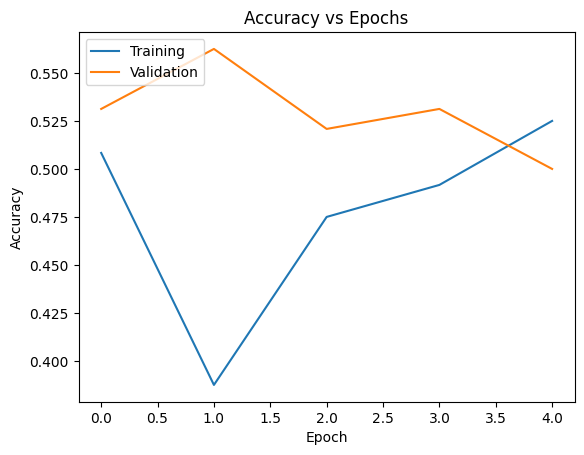

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

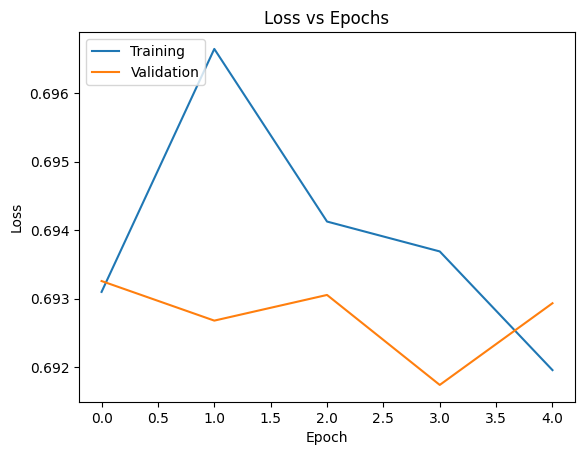

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print("Validation loss:", test_loss)
print("Validation accuracy:", test_acc)